In [1]:
#Import libraries
import numpy as np 
import pandas as pd
import os

# Data visualization
import matplotlib.pyplot as plt
plt.style.use("bmh")
%matplotlib inline
import seaborn as sns

# Machine learning
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.model_selection import cross_val_score
from sklearn.metrics import  confusion_matrix,f1_score,accuracy_score,roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, LabelEncoder
from sklearn.model_selection import GridSearchCV

# Hide warnings

import warnings
warnings.simplefilter('ignore')


In [2]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')
original_df = pd.read_csv('WineQT.csv')


In [3]:
train_df.shape

(2056, 13)

In [4]:
train_df.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,8.0,0.50,0.39,2.2,0.073,30.0,39.0,0.99572,3.33,0.77,12.1,6
1,1,9.3,0.30,0.73,2.3,0.092,30.0,67.0,0.99854,3.32,0.67,12.8,6
2,2,7.1,0.51,0.03,2.1,0.059,3.0,12.0,0.99660,3.52,0.73,11.3,7
3,3,8.1,0.87,0.22,2.6,0.084,11.0,65.0,0.99730,3.20,0.53,9.8,5
4,4,8.5,0.36,0.30,2.3,0.079,10.0,45.0,0.99444,3.20,1.36,9.5,6


In [5]:
test_df.shape

(1372, 12)

In [6]:
test_df.head()

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,2056,7.2,0.510,0.01,2.0,0.077,31.0,54.0,0.99748,3.39,0.59,9.8
1,2057,7.2,0.755,0.15,2.0,0.102,14.0,35.0,0.99586,3.33,0.68,10.0
2,2058,8.4,0.460,0.40,2.0,0.065,21.0,50.0,0.99774,3.08,0.65,9.5
3,2059,8.0,0.470,0.40,1.8,0.056,14.0,25.0,0.99480,3.30,0.65,11.7
4,2060,6.5,0.340,0.32,2.1,0.044,8.0,94.0,0.99356,3.23,0.48,12.8


In [7]:
original_df.shape

(1143, 13)

In [8]:
original_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [9]:
print('Train_combine Null Values:\t', train_df.isnull().sum())
print('Test_df Null Values:\t', test_df.isnull().sum())

Train_combine Null Values:	 Id                      0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64
Test_df Null Values:	 Id                      0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
dtype: int64


In [10]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2056.0,1027.500000,593.660397,0.00000,513.7500,1027.5000,1541.2500,2055.00000
fixed acidity,2056.0,8.365175,1.705390,5.00000,7.2000,7.9500,9.2000,15.90000
volatile acidity,2056.0,0.527601,0.173164,0.18000,0.3900,0.5200,0.6400,1.58000
citric acid,2056.0,0.265058,0.188267,0.00000,0.0900,0.2500,0.4200,0.76000
residual sugar,2056.0,2.398881,0.858824,1.20000,1.9000,2.2000,2.6000,14.00000
chlorides,2056.0,0.081856,0.023729,0.01200,0.0710,0.0790,0.0900,0.41400
free sulfur dioxide,2056.0,16.955982,10.009710,1.00000,8.0000,16.0000,24.0000,68.00000
total sulfur dioxide,2056.0,49.236868,32.961141,7.00000,22.0000,44.0000,65.0000,289.00000
density,2056.0,0.996748,0.001827,0.99007,0.9956,0.9967,0.9978,1.00369
pH,2056.0,3.310569,0.142321,2.74000,3.2000,3.3100,3.3900,3.78000


In [11]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2056 entries, 0 to 2055
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Id                    2056 non-null   int64  
 1   fixed acidity         2056 non-null   float64
 2   volatile acidity      2056 non-null   float64
 3   citric acid           2056 non-null   float64
 4   residual sugar        2056 non-null   float64
 5   chlorides             2056 non-null   float64
 6   free sulfur dioxide   2056 non-null   float64
 7   total sulfur dioxide  2056 non-null   float64
 8   density               2056 non-null   float64
 9   pH                    2056 non-null   float64
 10  sulphates             2056 non-null   float64
 11  alcohol               2056 non-null   float64
 12  quality               2056 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 208.9 KB


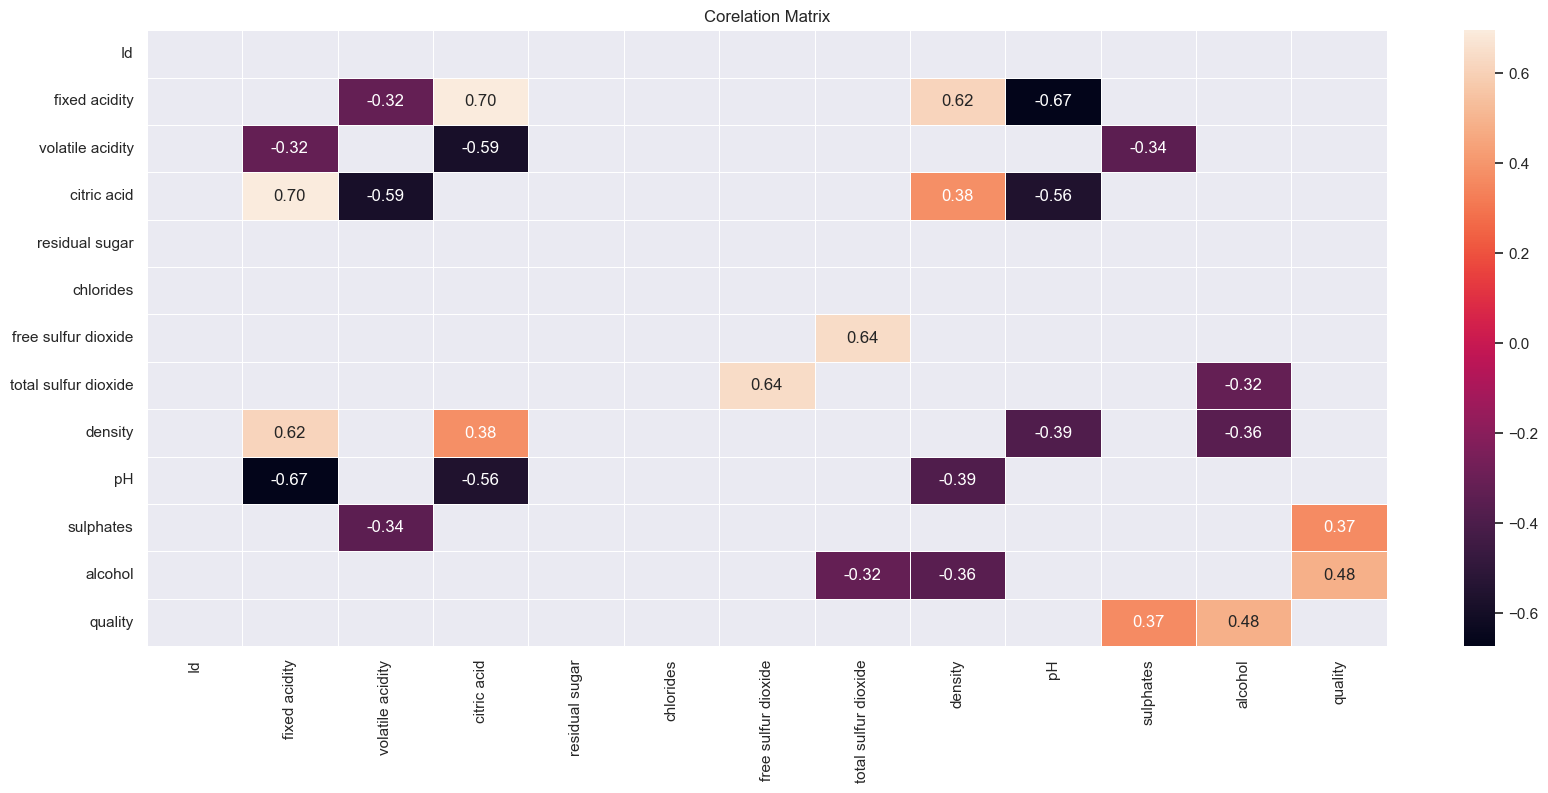

In [12]:
sns.set(rc={'figure.figsize':(20,8)})
corr = train_df.corr()
sns.heatmap(corr[((corr >= 0.3) | (corr <= -0.3)) & (corr != 1)], annot=True, linewidths=.5, fmt= '.2f')
plt.title('Corelation Matrix');

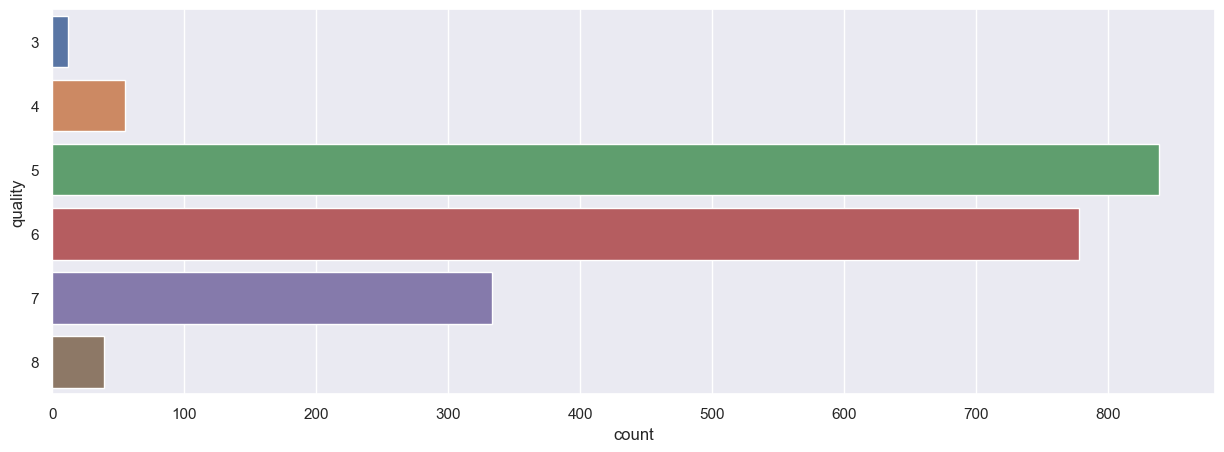

In [13]:
sns.set(rc={'figure.figsize':(15,5)})
sns.countplot(y=train_df['quality'])
plt.show()

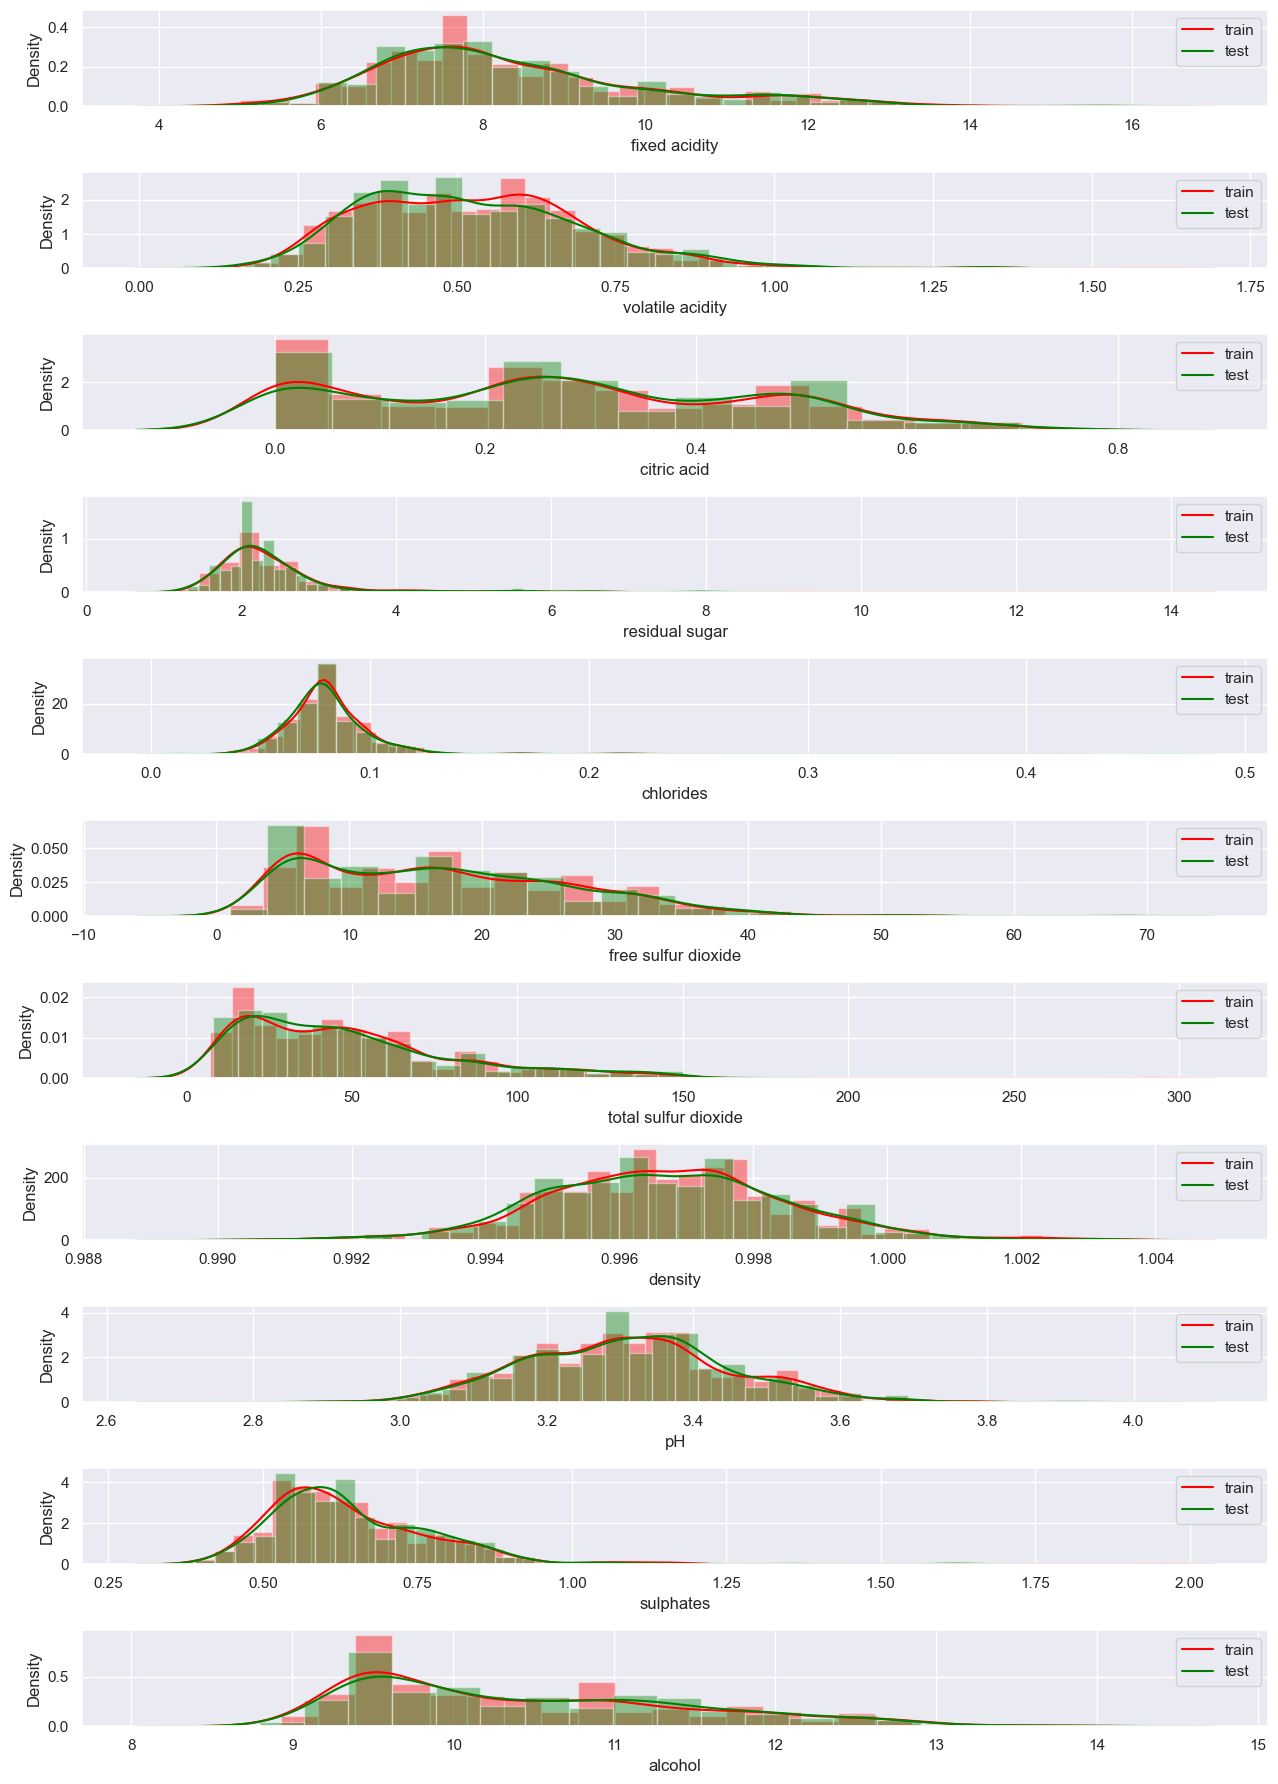

In [16]:
columns = train_df.drop(['Id', 'quality'], axis=1).columns
plt.figure(figsize=(25, 18))

for index, column in enumerate(columns):
    plt.subplot(11, 2, 2*index+1)
    sns.distplot(x=train_df[column], color='red')
    sns.distplot(x=test_df[column], color='green')
    plt.legend(['train', 'test'])
    plt.xlabel(column)
   

plt.tight_layout()

In [17]:
y= train_df['quality']
X= train_df.drop(['Id', 'quality'], axis=1)
test=test_df.drop(['Id'], axis=1)

In [19]:
# import library
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=42)

x_ros, y_ros = ros.fit_resample(X, y)

print('Original dataset shape', Counter(y))
print('Resample dataset shape', Counter(y_ros))

Original dataset shape Counter({5: 839, 6: 778, 7: 333, 4: 55, 8: 39, 3: 12})
Resample dataset shape Counter({6: 839, 7: 839, 5: 839, 4: 839, 8: 839, 3: 839})


In [20]:
x_train, x_test, y_train, y_test = train_test_split(x_ros, y_ros, test_size=0.3, random_state=42)

In [21]:
# load library
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

# fit the predictor and target
rfc.fit(x_train, y_train)

# predict
rfc_predict = rfc.predict(x_test)# check performance


print('Accuracy score:',accuracy_score(y_test, rfc_predict))

Accuracy score: 0.8371939113170086


In [22]:
y_test=rfc.predict(test)

In [23]:
y_test=y_test.astype(int)

In [24]:
submission = pd.DataFrame({
    "Id":test_df["Id"],
    "quality":y_test
})
submission.head()

,Id,quality
0,2056,6
1,2057,6
2,2058,5
3,2059,6
4,2060,6
